In [1]:
import pandas as pd
df=pd.read_csv("https://raw.githubusercontent.com/SK81300/Student-Intervention-System/master/student-data.csv")
df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,passed
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,no,no,4,3,4,1,1,3,6,no
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,yes,no,5,3,3,1,1,3,4,no
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,yes,no,4,3,2,2,3,3,10,yes
3,GP,F,15,U,GT3,T,4,2,health,services,...,yes,yes,3,2,2,1,1,5,2,yes
4,GP,F,16,U,GT3,T,3,3,other,other,...,no,no,4,3,2,1,2,5,4,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,...,no,no,5,5,4,4,5,4,11,no
391,MS,M,17,U,LE3,T,3,1,services,services,...,yes,no,2,4,5,3,4,2,3,yes
392,MS,M,21,R,GT3,T,1,1,other,other,...,no,no,5,5,3,3,3,3,3,no
393,MS,M,18,R,LE3,T,3,2,services,other,...,yes,no,4,4,1,3,4,5,0,yes


In [2]:
# Lets check is there are null values or not in the dataset
df.isnull().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
passed        0
dtype: int64

In [3]:
df.dtypes

school        object
sex           object
age            int64
address       object
famsize       object
Pstatus       object
Medu           int64
Fedu           int64
Mjob          object
Fjob          object
reason        object
guardian      object
traveltime     int64
studytime      int64
failures       int64
schoolsup     object
famsup        object
paid          object
activities    object
nursery       object
higher        object
internet      object
romantic      object
famrel         int64
freetime       int64
goout          int64
Dalc           int64
Walc           int64
health         int64
absences       int64
passed        object
dtype: object

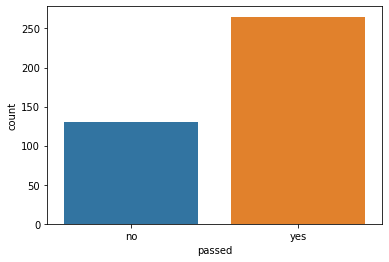

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(x="passed",data=df)
plt.show()

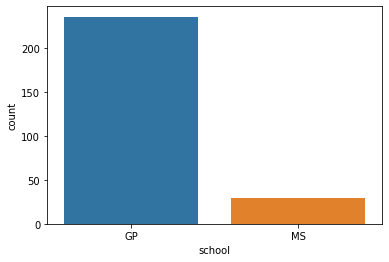

In [5]:
sns.countplot(x="school",data=df.loc[df["passed"]=="yes"])
plt.show()

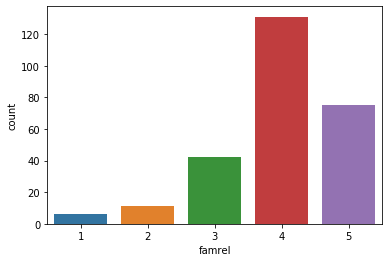

In [6]:
#lets check the effect of family relations
sns.countplot(x="famrel",data=df.loc[df["passed"]=="yes"])
plt.show()
#count of passed with bad family relations are very less

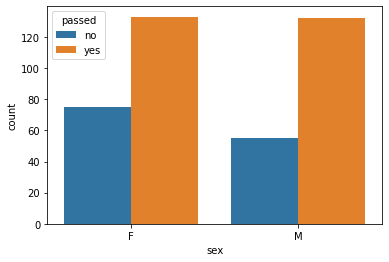

In [7]:
#lets check the count of passed based on gender
sns.countplot(x="sex",hue="passed",data=df)
plt.show()

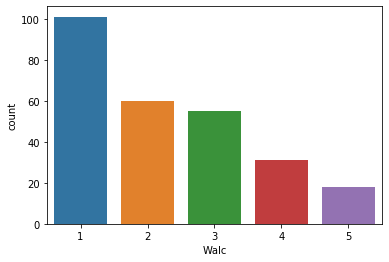

In [8]:
#lets check count based on work day alcohol consumption
sns.countplot(x="Walc",data=df.loc[df["passed"]=="yes"])
plt.show()
#this shows there is clear relationship with alcohol consumption
#passed count decreases as alcolhol consumption increases

In [9]:
#Lets prepare input and output datasets
df_x=df.drop(columns=["passed","address"])
y=df[["passed"]]

In [10]:
#lets convert categorical columns to integers using one hot encoding
df_x=pd.get_dummies(df_x,drop_first=True)
df_x.shape

(395, 38)

In [11]:
#let's bring the features to same scale
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sc.fit(df_x)
x=sc.transform(df_x)
x=pd.DataFrame(x,columns=df_x.columns)

In [12]:
#lets use labelencoder to convert target class into integers
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
le.fit(y)
y=le.transform(y)
y

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1,
       1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1,

In [13]:
#lets use pca
from sklearn.decomposition import PCA
pca=PCA(n_components=31)
pca.fit(x)
x1=pca.transform(x)
sum(pca.explained_variance_ratio_)

0.9504016753747798

In [14]:
#We will use f1 score as the metrics as it is balanced dataset problem
#Maximum f1 score in between random states 42 to 100
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split
def maxf1_score(clf,df_x,y):
    maxf=0
    rs=0
    for r_state in range(42,100):
        x_train,x_test,y_train,y_test=train_test_split(df_x, y,random_state = r_state,test_size=0.20,stratify=y)
        x_train, y_train = SMOTE().fit_sample(x_train, y_train)
        clf.fit(x_train,y_train)
        y_pred=clf.predict(x_test)
        tmp=f1_score(y_test,y_pred)
        #print("random state :",r_state," and f1 score: ",tmp)
        if tmp>maxf:
            maxf=tmp
            rs=r_state
    print("maximum f1_score is at random state :",rs," and it is :",maxf)

In [15]:
#since it is imbalanced dataset so we will focus on auc-roc score
from imblearn.over_sampling import SMOTE
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
def max_aucroc_score(clf,df_x,y):
    max_aucroc_score=0
    for r_state in range(42,100):
        x_train, x_test, y_train, y_test = train_test_split(df_x, y,random_state = r_state,test_size=0.20,stratify=y)
        x_train, y_train = SMOTE().fit_sample(x_train, y_train)
        clf.fit(x_train,y_train)
        y_pred = clf.predict(x_test)
        aucroc_scr=roc_auc_score(y_test,y_pred)
        #print("auc roc score corresponding to ",r_state," is ",aucroc_scr)
        if aucroc_scr>max_aucroc_score:
            max_aucroc_score=aucroc_scr
            final_r_state=r_state
    print("max auc roc score corresponding to ",final_r_state," is ",max_aucroc_score)
    return final_r_state

In [16]:
#lets make a function which evaluates the model using cross_val_score
from sklearn.model_selection import cross_val_score
def model_evaluation_roc(model,x,y):
    print("Mean roc auc score for classifier: ",cross_val_score(model,x,y,cv=10,scoring="roc_auc").mean())
    print("standard deviation in roc auc score for classifier: ",cross_val_score(model,x,y,cv=10,scoring="roc_auc").std())
    print(cross_val_score(model,x,y,cv=10,scoring="roc_auc"))

In [17]:
#lets make a function which evaluates the model using cross_val_score
from sklearn.model_selection import cross_val_score
def model_evaluation_f1(model,x,y):
    print("Mean f1 score for classifier: ",cross_val_score(model,x,y,cv=10,scoring="f1").mean())
    print("standard deviation in f1 score for classifier: ",cross_val_score(model,x,y,cv=10,scoring="f1").std())
    print(cross_val_score(model,x,y,cv=10,scoring="f1"))

In [18]:
#Lets chcek logistic regression
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings("ignore")
lg_clf=LogisticRegression()
max_aucroc_score(lg_clf,x1,y)
maxf1_score(lg_clf,x1,y)

max auc roc score corresponding to  66  is  0.7616110304789551
maximum f1_score is at random state : 98  and it is : 0.8155339805825242


In [19]:
#lets print the scores for logistic regression
print("LOGISTIC CLASSIFIER\n\n")
model_evaluation_roc(lg_clf,x1,y)
print("\n")
model_evaluation_f1(lg_clf,x1,y)

LOGISTIC CLASSIFIER


Mean roc auc score for classifier:  0.67396449704142
standard deviation in roc auc score for classifier:  0.08457714746948339
[0.67806268 0.6951567  0.62393162 0.82905983 0.48148148 0.74260355
 0.63017751 0.67455621 0.70118343 0.68343195]


Mean f1 score for classifier:  0.7879155642649822
standard deviation in f1 score for classifier:  0.03629877138222469
[0.8125     0.78688525 0.79310345 0.81481481 0.74576271 0.84210526
 0.81355932 0.78431373 0.77777778 0.70833333]


In [20]:
#Lets chcek SVM Classifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
svc=SVC()
parameters={"kernel":["linear", "poly", "rbf"],"C":[0.001,0.01,0.1,1,10]}
clf = GridSearchCV(svc, parameters, cv=10,scoring="roc_auc")
clf.fit(x1,y)
clf.best_params_

{'C': 0.001, 'kernel': 'linear'}

In [22]:
svc=SVC(C=0.001,kernel="linear")
max_aucroc_score(svc,x1,y)
maxf1_score(svc,x1,y)

max auc roc score corresponding to  47  is  0.7224238026124817
maximum f1_score is at random state : 97  and it is : 0.8347826086956522


In [23]:
#lets print the scores for SVM classifier
print("SVM CLASSIFIER\n\n")
model_evaluation_roc(svc,x1,y)
print("\n")
model_evaluation_f1(svc,x1,y)

SVM CLASSIFIER


Mean roc auc score for classifier:  0.7064869603331141
standard deviation in roc auc score for classifier:  0.10939473330169106
[0.71509972 0.61823362 0.67521368 0.83475783 0.47008547 0.81065089
 0.68934911 0.65088757 0.74260355 0.85798817]


Mean f1 score for classifier:  0.8029850746268657
standard deviation in f1 score for classifier:  0.002985074626865647
[0.80597015 0.80597015 0.80597015 0.80597015 0.80597015 0.8
 0.8        0.8        0.8        0.8       ]


In [24]:
#lets chcek KNN
from sklearn.neighbors import KNeighborsClassifier
import warnings
warnings.filterwarnings("ignore")
kc=KNeighborsClassifier()
neighbors={"n_neighbors":range(1,30)}
clf = GridSearchCV(kc, neighbors, cv=10,scoring="roc_auc")
clf.fit(x1,y)
clf.best_params_

{'n_neighbors': 29}

In [25]:
kc=KNeighborsClassifier(n_neighbors=29)
max_aucroc_score(kc,x1,y)
maxf1_score(kc,x1,y)

max auc roc score corresponding to  43  is  0.659288824383164
maximum f1_score is at random state : 54  and it is : 0.617283950617284


In [26]:
#lets print the scores for KNN classifier
print("KNN CLASSIFIER\n\n")
model_evaluation_roc(kc,x1,y)
print("\n")
model_evaluation_f1(kc,x1,y)

KNN CLASSIFIER


Mean roc auc score for classifier:  0.627520271751041
standard deviation in roc auc score for classifier:  0.09463841441730336
[0.66524217 0.68376068 0.55128205 0.78917379 0.46296296 0.73076923
 0.55473373 0.68343195 0.60650888 0.54733728]


Mean f1 score for classifier:  0.800039100684262
standard deviation in f1 score for classifier:  0.01355695061357647
[0.81818182 0.78787879 0.78787879 0.80645161 0.8        0.78125
 0.8125     0.8125     0.8125     0.78125   ]


In [27]:
#lets use decision tree classifier
from sklearn.tree import DecisionTreeClassifier
dc=DecisionTreeClassifier()
max_aucroc_score(dc,df_x,y)
maxf1_score(svc,x1,y)

max auc roc score corresponding to  66  is  0.6952104499274311
maximum f1_score is at random state : 43  and it is : 0.8387096774193548


In [28]:
#lets print the scores for decision tree classifier
print("Decisison Tree CLASSIFIER\n\n")
model_evaluation_roc(dc,df_x,y)
print("\n")
model_evaluation_f1(dc,df_x,y)

Decisison Tree CLASSIFIER


Mean roc auc score for classifier:  0.5602564102564102
standard deviation in roc auc score for classifier:  0.058716637208176756
[0.44586895 0.54558405 0.54558405 0.65811966 0.54131054 0.53846154
 0.55769231 0.61538462 0.55769231 0.57692308]


Mean f1 score for classifier:  0.7125663636388522
standard deviation in f1 score for classifier:  0.041545153799765214
[0.66666667 0.70588235 0.7037037  0.73076923 0.78688525 0.69090909
 0.70588235 0.66666667 0.63829787 0.56521739]


In [29]:
#lets chcek random forest also
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
parameters={"n_estimators":[10,100,500]}
rf_clf=RandomForestClassifier()
clf = GridSearchCV(rf_clf, parameters, cv=10,scoring="roc_auc")
clf.fit(df_x,y)
clf.best_params_

{'n_estimators': 500}

In [30]:
rf_clf=RandomForestClassifier(n_estimators=500)
max_aucroc_score(rf_clf,df_x,y)
maxf1_score(rf_clf,df_x,y)

max auc roc score corresponding to  70  is  0.6748911465892599
maximum f1_score is at random state : 97  and it is : 0.8545454545454546


In [31]:
#Lets print the scores of random forest
print("Random Forest CLASSIFIER\n\n")
model_evaluation_roc(rf_clf,df_x,y)
print("\n")
model_evaluation_f1(rf_clf,df_x,y)

Random Forest CLASSIFIER


Mean roc auc score for classifier:  0.662617795310103
standard deviation in roc auc score for classifier:  0.07427590066460038
[0.68376068 0.60968661 0.6980057  0.85754986 0.52279202 0.71597633
 0.57248521 0.68343195 0.67159763 0.61538462]


Mean f1 score for classifier:  0.7937472939261598
standard deviation in f1 score for classifier:  0.04553535560436669
[0.8        0.78125    0.81355932 0.87272727 0.79365079 0.81355932
 0.8        0.74074074 0.77966102 0.78571429]


In [32]:
# based on above best model is SVM
svc=SVC(C=0.001,kernel="linear")
x_train, x_test, y_train, y_test = train_test_split(x1, y,random_state = 97,test_size=0.20,stratify=y)
x_train, y_train = SMOTE().fit_sample(x_train, y_train)
svc.fit(x_train,y_train)
y_pred=svc.predict(x_test)

In [33]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
print("Confusion matrix \n",confusion_matrix(y_test,y_pred))
print("f1 score is : ",f1_score(y_test,y_pred))
print("classification report \n",classification_report(y_test,y_pred))
print("AUC ROC Score: ",roc_auc_score(y_test,y_pred))

Confusion matrix 
 [[12 14]
 [ 8 45]]
f1 score is :  0.8035714285714285
classification report 
               precision    recall  f1-score   support

           0       0.60      0.46      0.52        26
           1       0.76      0.85      0.80        53

    accuracy                           0.72        79
   macro avg       0.68      0.66      0.66        79
weighted avg       0.71      0.72      0.71        79

AUC ROC Score:  0.6552975326560233
